# Import Data

In [1]:
import yfinance as yf
import pandas as pd

tickers = ['PG', '^GSPC']
start_date = '2019-01-01'
end_date = '2024-12-06'

pf_data = pd.DataFrame()

for t in tickers:      
    pf_data[t] = yf.download(t, start=start_date, end=end_date)['Adj Close']

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


In [2]:
pf_data

,PG,^GSPC
Date,,
2019-01-02,78.474571,2510.030029
2019-01-03,77.924370,2447.889893
2019-01-04,79.514832,2531.939941
2019-01-07,79.196724,2549.689941
2019-01-08,79.489029,2574.409912
...,...,...
2024-11-29,179.259995,6032.379883
2024-12-02,179.699997,6047.149902
2024-12-03,175.419998,6049.879883


In [3]:
pf_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1493 entries, 2019-01-02 to 2024-12-05
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   PG      1493 non-null   float64
 1   ^GSPC   1493 non-null   float64
dtypes: float64(2)
memory usage: 35.0 KB


# Calculate Simple Returns

In [4]:
import numpy as np

Simple_Ret = (pf_data / pf_data.shift(1))-1

In [5]:
Simple_Ret

,PG,^GSPC
Date,,
2019-01-02,NaN,NaN
2019-01-03,-0.007011,-0.024757
2019-01-04,0.020410,0.034336
2019-01-07,-0.004001,0.007010
2019-01-08,0.003691,0.009695
...,...,...
2024-11-29,-0.000558,0.005608
2024-12-02,0.002455,0.002448
2024-12-03,-0.023817,0.000451


# Beta

In [6]:
cov = Simple_Ret.cov() * 250
cov

,PG,^GSPC
PG,0.040986,0.022148
^GSPC,0.022148,0.040397


In [7]:
# Turn covariance into a float
cov_with_market = cov.iloc[0,1]
cov_with_market

0.02214836663538443

In [8]:
market_var = Simple_Ret['^GSPC'].var() * 250
market_var

0.04039702701080622

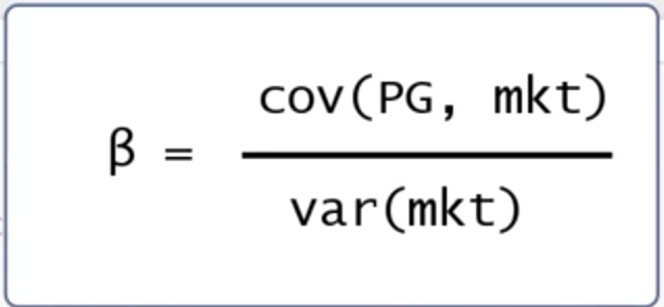

In [9]:
PG_beta = cov_with_market / market_var
PG_beta

0.5482672432666823

# CAPM

#### Risk Free

In [10]:
risk_free = yf.download('^TNX')['Adj Close'].iloc[-1] / 100
risk_free

[*********************100%%**********************]  1 of 1 completed


0.045729999542236326

#### Market Return

In [11]:
market_data = yf.download('^GSPC', period='70y')['Adj Close']
market_data

[*********************100%%**********************]  1 of 1 completed


Date
1955-01-03      36.750000
1955-01-04      36.419998
1955-01-05      35.520000
1955-01-06      35.040001
1955-01-07      35.330002
                 ...     
2024-12-24    6040.040039
2024-12-26    6037.589844
2024-12-27    5970.839844
2024-12-30    5906.939941
2024-12-31    5881.629883
Name: Adj Close, Length: 17620, dtype: float64

In [12]:
market_ret = (market_data / market_data.shift(1))-1
market_ret

Date
1955-01-03         NaN
1955-01-04   -0.008980
1955-01-05   -0.024712
1955-01-06   -0.013514
1955-01-07    0.008276
                ...   
2024-12-24    0.011043
2024-12-26   -0.000406
2024-12-27   -0.011056
2024-12-30   -0.010702
2024-12-31   -0.004285
Name: Adj Close, Length: 17620, dtype: float64

In [13]:
market_ret_a = market_ret.mean() * 250
market_ret_a

0.08480907887209241

#### Expected Return

In [14]:
PG_er = risk_free + PG_beta * (market_ret_a - risk_free)
PG_er

0.06715577863581651

# Sharpe Ratio

In [15]:
Sharpe_PG = (PG_er - risk_free) / (Simple_Ret['PG'].std() * 250 ** 0.5)
Sharpe_PG

0.10583268272865624